In [66]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 73.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b243382424118101e4623e3da0a8baae592d2525ba881ad67f6ca907504ae6c4
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

In [49]:
num = 1000000

In [50]:
rng = np.random.default_rng()
dice_arr = rng.integers(1,7,num*100)

In [45]:
def calc():
  goal_count = 0
  ans = []
  rng = np.random.default_rng()
  dice_arr = rng.integers(1,7,num)
  track = [["miyu", 5], ["credit", 3200], ["tama", 15], ["report", 22], ["kakera", 8], ["miyu", 7],
         ["kakera", 12], ["credit", 2400], ["move", 6], ["credit", 1600], ["tama", 12], ["report", 10],
         ["kakera", 6], ["miyu", 4], ["ticket", 1], ["tama", 10], ["credit", 2000], ["report", 17]]
  reward = {"miyu" : 80, "kakera" : 0, "credit" : 0, "report" : 0, "tama" : 0}  #周回数ボーナスを加算している
  tickets = [0,0,0,0,0,0,0] #確定移動チケット
  crr_pst = 0 #現在位置
  i = 0

  while reward["miyu"] < 630:

    if crr_pst in [17,0,1,2,3,4]: #チケット使用
      if tickets[6 - (crr_pst+1)%6] > 0:
        tickets[6 - (crr_pst+1)%6] -= 1
        crr_pst = 5
        reward["miyu"] += 7

    crr_pst += dice_arr[i]  #ダイスを振る(modは後で)
    i += 1


    if crr_pst  >= 18:  #ゴール処理
      goal_count += 1
      if goal_count in [2,4,6,8,10]:  #周回数ボーナスのチケット取得
        tickets[rng.integers(1,7)] += 1

    crr_pst = crr_pst % 18  #modを取る

    if crr_pst == 8:
      crr_pst += 6

    if crr_pst == 14:
      tickets[rng.integers(1,7)] += 1
      continue

    rwd_type, rwd_num = track[crr_pst]
    reward[rwd_type] += rwd_num
  return i

                  0
count  50000.000000
mean     352.919120
std       26.665317
min      260.000000
25%      334.000000
50%      352.000000
75%      371.000000
max      479.000000


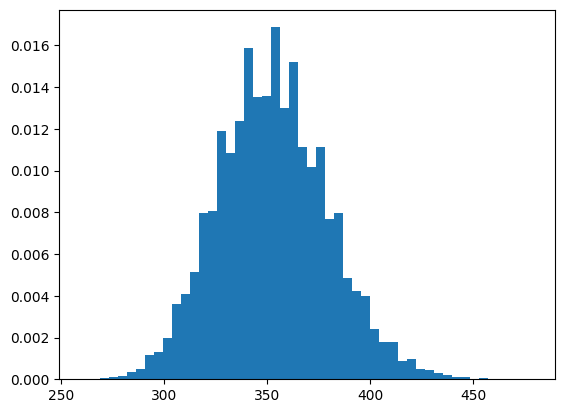

In [46]:
ans = []  #必要抽選回数
for i in range(50000):
  ans.append(calc())
df = pd.DataFrame(ans)
print(df.describe())
plt.hist(ans, bins=50, density=True)
plt.show()

count    50000.000000
mean      3331.449167
std        277.763717
min       2363.541667
25%       3134.375000
50%       3321.875000
75%       3519.791667
max       4644.791667
dtype: float64


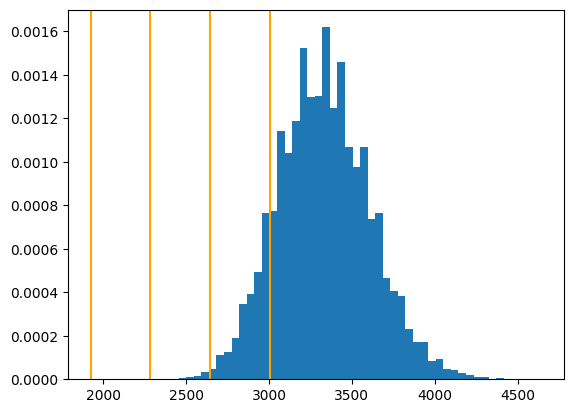

100割での固有3完成率: 0.318000 %
150割での固有3完成率: 11.578000 %


In [47]:
ans = np.array(ans)
ap = (ans*500-8550)*20/80.0 - 2000
ap_day = ap/12
df2 = pd.Series(ap_day)
print(df2.describe())
plt.hist(ap_day, bins=50, density=True)

#時間、カフェ、デイリー、サークル、対抗戦、パック、ウィークリー、石
plt.axvline(x=240+603.6+150+10+360+150+50+120*3, color="orange")
plt.axvline(x=240+603.6+150+10+360+150+50+120*6, color="orange")
plt.axvline(x=240+603.6+150+10+360+150+50+120*9, color="orange")
plt.axvline(x=240+603.6+150+10+360+150+50+120*12, color="orange")
plt.show()

cnt = 0
cnt2 = 0
for i in range(50000):
  if ap_day[i] <= 240+603.6+150+10+360+150+50+120*9:
    cnt += 1
  if ap_day[i]  <= 240+603.6+150+10+360+150+50+120*12:
    cnt2 += 1

cnt /= 500.0
cnt2 /= 500.0
print("100割での固有3完成率: %f %%" % cnt)
print("150割での固有3完成率: %f %%" % cnt2)

In [76]:
def calc2(num_30, num_60, num_100, num_150):
  goal_count = 0
  ans = [0,0,0,0]
  rng = np.random.default_rng()
  dice_arr = rng.integers(1,7,num)
  track = [["miyu", 5], ["credit", 3200], ["tama", 15], ["report", 22], ["kakera", 8], ["miyu", 7],
         ["kakera", 12], ["credit", 2400], ["move", 6], ["credit", 1600], ["tama", 12], ["report", 10],
         ["kakera", 6], ["miyu", 4], ["ticket", 1], ["tama", 10], ["credit", 2000], ["report", 17]]
  reward = {"miyu" : 80, "kakera" : 0, "credit" : 0, "report" : 0, "tama" : 0}  #周回数ボーナスを加算している
  tickets = [0,0,0,0,0,0,0] #確定移動チケット
  crr_pst = 0 #現在位置
  i = 0

  for i in range(num_150):

    if crr_pst in [17,0,1,2,3,4]: #チケット使用
      if tickets[6 - (crr_pst+1)%6] > 0:
        tickets[6 - (crr_pst+1)%6] -= 1
        crr_pst = 5
        reward["miyu"] += 7

    crr_pst += dice_arr[i]  #ダイスを振る(modは後で)
    i += 1


    if crr_pst  >= 18:  #ゴール処理
      goal_count += 1
      if goal_count in [2,4,6,8,10]:  #周回数ボーナスのチケット取得
        tickets[rng.integers(1,7)] += 1

    crr_pst = crr_pst % 18  #modを取る

    if crr_pst == 8:
      crr_pst += 6

    if crr_pst == 14:
      tickets[rng.integers(1,7)] += 1
    else:
      rwd_type, rwd_num = track[crr_pst]
      reward[rwd_type] += rwd_num

    if i == num_30:
      ans[0] = reward["miyu"]
    if i == num_60:
      ans[1] = reward["miyu"]
    if i == num_100:
      ans[2] = reward["miyu"]
  ans[3] = reward["miyu"]

  return ans

In [ ]:
ans1 = []
ans2 = []
ans3 = []
ans4 = []
num_30 = int((240+603.6+150+10+360+150+50+120*3)*12*80//(20*500))
num_60 = int((240+603.6+150+10+360+150+50+120*6)*12*80//(20*500))
num_100 = int((240+603.6+150+10+360+150+50+120*9)*12*80//(20*500))
num_150 = int((240+603.6+150+10+360+150+50+120*12)*12*80//(20*500))
ans = calc2(num_30,num_60,num_100,num_150)
for i in range(50000):
  ans = calc2(num_30,num_60,num_100,num_150)
  ans1.append(ans[0])
  ans2.append(ans[1])
  ans3.append(ans[2])
  ans4.append(ans[3])


In [ ]:
print(ans4[:10])

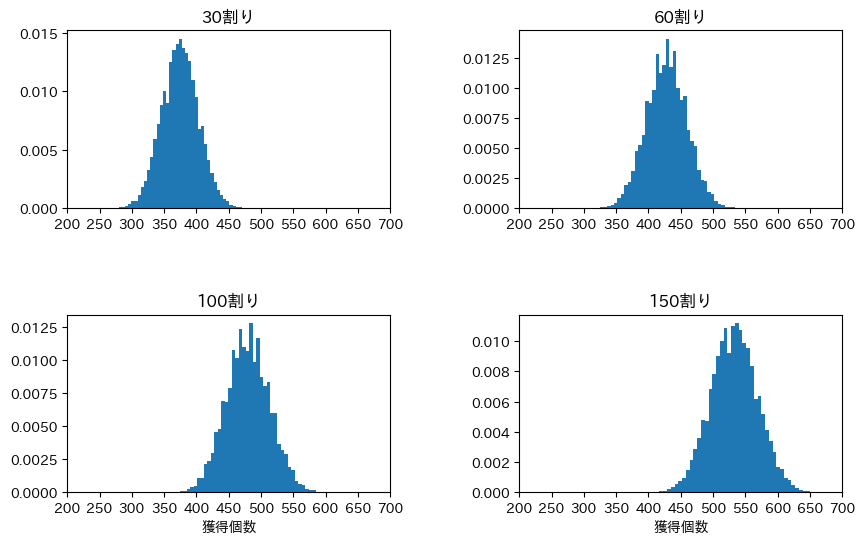

In [88]:
fig, ax = plt.subplots(2,2,figsize=(10.0, 6.0))
xlist = np.linspace(200, 700, 11)
for i in range(2):
  for j in range(2):
    ax[i,j].set_xlim(200,700)
    ax[i,j].set_xticks(xlist)
ax[0,0].set_title("30割り")
ax[0,1].set_title("60割り")
ax[1,0].set_title("100割り")
ax[1,1].set_title("150割り")
ax[1,0].set_xlabel("獲得個数")
ax[1,1].set_xlabel("獲得個数")
ax[0,0].hist(ans1,bins=50,density=True)
ax[0,1].hist(ans2,bins=50,density=True)
ax[1,0].hist(ans3,bins=50,density=True)
ax[1,1].hist(ans4,bins=50,density=True)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

In [93]:
print("60割り")
df_60 = pd.DataFrame(ans2)
print(df_60.describe())
print("\n")
print("100割り")
df_100 = pd.DataFrame(ans3)
print(df_100.describe())

60割り
                  0
count  50000.000000
mean     427.921000
std       31.146668
min      293.000000
25%      407.000000
50%      428.000000
75%      449.000000
max      561.000000


100割り
                  0
count  50000.000000
mean     479.597320
std       33.732612
min      347.000000
25%      457.000000
50%      479.000000
75%      502.000000
max      617.000000
